# Testes iniciais

In [3]:
import os
import fire

from mlpy.lib.utils.path import makedirs, tag_path
from mlpy.lib.utils.log import set_logging
from mlpy.lib.tfops.base import tf_keras_set_gpu_allow_growth
from mlpy.configure import DIR_DATA_UCR15
from mlpy.datasets.ucr_uea.data_names import UCR85_DATASETS

from tcgan.lib.exp import Experiment
from configure import DIR_LOG
from tcgan.model.tcgan import TCGAN, TCGANConfig

Using TensorFlow backend.


In [2]:
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
# data_name_list = UCR85_DATASETS
data_name_list = ['50words']

model_cfg = dict(acc_threshold_to_train_d=0.75, kernel_size=10)
exp_cfg = dict(use_testset=True, idx_layer=-3)
exp = Experiment(tag, TCGAN, TCGANConfig, DIR_DATA_UCR15, data_name_list, log_dir,
                    model_cfg_kwargs=model_cfg,
                    **exp_cfg)

fire.Fire(exp.run)

09/10 12:03:13 AM, INFO, github_: ****** process dataset 50words
use_testset=True
09/10 12:03:13 AM, INFO, github__50words: ****** configure init ******
09/10 12:03:14 AM, INFO, github__50words: The settings are as follows: 
strides:2
padding:same
initializer:<tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x000001C21CB62DD8>
leak_slope:0.2
logger:<Logger github__50words (INFO)>
log_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words
train_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words\training
eval_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words\evaluation
ckpt_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words\checkpoint
ckpt_prefix:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words\checkpoint\ckpt
seed:42
np_rs:RandomState(MT19937)
verbose:1
x_shape:(270, 1)
noise_shape:(100,)
noise_method:normal
noise_samp

KeyboardInterrupt: 

# Sines data

In [5]:
import os

import numpy as np

from mlpy.lib.utils.path import makedirs

DIR_DATA = './TimeGANSine'

In [6]:
def sine_data_generation(no, seq_len, dim):
    """ copy from: https://github.com/jsyoon0823/TimeGAN/blob/master/data_loading.py
    Sine data generation.

  Args:
    - no: the number of samples
    - seq_len: sequence length of the time-series
    - dim: feature dimensions

  Returns:
    - data: generated data
  """
    # Initialize the output
    data = list()

    # Generate sine data
    for i in range(no):
        # Initialize each time-series
        temp = list()
        # For each feature
        for k in range(dim):
            # Randomly drawn frequency and phase
            freq = np.random.uniform(0, 0.1)
            phase = np.random.uniform(0, 0.1)

            # Generate sine signal based on the drawn frequency and phase
            temp_data = [np.sin(freq * j + phase) for j in range(seq_len)]
            temp.append(temp_data)

        # Align row/column
        temp = np.transpose(np.asarray(temp))
        # Normalize to [0,1]
        temp = (temp + 1) * 0.5
        # Stack the generated data
        data.append(temp)

    return data


def sine_dim5_len24_random(r=0):  # the primitive data
    seq_len = 24
    no, dim = 10000, 5
    data = sine_data_generation(no, seq_len, dim)
    data = np.stack(data)
    np.save(os.path.join(DIR_DATA, f'sine_dim{dim}_len{seq_len}_r{r}'), data)


def sine_dim1_len100_random(r=0):
    seq_len = 100
    no, dim = 10000, 1
    data = sine_data_generation(no, seq_len, dim)
    data = np.stack(data)
    np.save(os.path.join(DIR_DATA, f'sine_dim{dim}_len{seq_len}_r{r}'), data)

In [7]:
makedirs(DIR_DATA)

# Prepare datasets for for multiple random runs.
for r in range(5):
    sine_dim5_len24_random(r)

for r in range(5):
    sine_dim1_len100_random(r)

# Próximos passos

In [ ]:
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
# data_name_list = UCR85_DATASETS
data_name_list = ['50words']

model_cfg = dict(acc_threshold_to_train_d=0.75, kernel_size=10)
exp_cfg = dict(use_testset=True, idx_layer=-3)
exp = Experiment(tag, TCGAN, TCGANConfig, DIR_DATA_UCR15, data_name_list, log_dir,
                    model_cfg_kwargs=model_cfg,
                    **exp_cfg)

fire.Fire(exp.run)

In [2]:
import numpy as np
from mlpy.lib.data.utils import train_test_split, one_hot_to_dense
import tensorflow as tf
from tcgan.lib.eval import EvaluatorGAN, EvaluatorClf

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\Users\dami_\anaconda3\envs\tcgan\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\50words\\50words_TRAIN'
data_train = np.genfromtxt(path, delimiter=',', dtype=np.float32)
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\50words\\50words_TEST'
data_test = np.genfromtxt(path, delimiter=',', dtype=np.float32)
print(data_train.shape, data_test.shape)

(450, 271) (455, 271)


In [8]:
# parse
x_tr = data_train[:, 1::]
y_tr = data_train[:, 0].astype(int)
x_te = data_test[:, 1::]
y_te = data_test[:, 0].astype(int)
y_all = np.concatenate([y_tr, y_te])
classes, y_all = np.unique(y_all, return_inverse=True)
n_class = len(classes)
x_tr = x_tr[..., np.newaxis]
x_te = x_te[..., np.newaxis]

In [9]:
# all data can be used in unsupervised learning
x_all = np.vstack([x_tr, x_te])
_, x_te_gan, _, _ = train_test_split(
    x_all, y_all, train_size=0.9, random_state=42, stratify=y_all)
x_tr_gan = x_all  # use all

In [10]:
input_shape = x_tr.shape[1:]
# input_shape = x_tr_gan.shape
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
model_cfg = TCGANConfig(input_shape, log_dir, logger, **dict(acc_threshold_to_train_d=0.75, kernel_size=10))
evaluator = EvaluatorGAN(model_cfg)

09/10 12:07:18 AM, INFO, github_: ****** configure init ******
09/10 12:07:19 AM, INFO, github_: The settings are as follows: 
strides:2
padding:same
initializer:<tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x00000177DBEA8C50>
leak_slope:0.2
logger:<Logger github_ (INFO)>
log_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_
train_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\training
eval_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\evaluation
ckpt_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint
ckpt_prefix:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint\ckpt
seed:42
np_rs:RandomState(MT19937)
verbose:1
x_shape:(270, 1)
noise_shape:(100,)
noise_method:normal
noise_sampler:<function random_normal at 0x00000177BD0A5B70>
batch_size:16
epochs:300
g_lr:0.0002
d_lr:0.0002
g_beta1:0.5
d_beta1:0.5
g_units_base:32
d_units_base:32


In [11]:
model = TCGAN(model_cfg, evaluator)
model.fit(x_tr_gan, x_te_gan)
tf.keras.backend.clear_session()

09/10 12:07:25 AM, INFO, github_: Generator's summary: 
09/10 12:07:25 AM, INFO, github_: Model: "functional_1"
09/10 12:07:25 AM, INFO, github_: _________________________________________________________________
09/10 12:07:25 AM, INFO, github_: Layer (type)                 Output Shape              Param #   
09/10 12:07:25 AM, INFO, github_: =================================================================
09/10 12:07:25 AM, INFO, github_: input_1 (InputLayer)         [(None, 100)]             0         
09/10 12:07:25 AM, INFO, github_: _________________________________________________________________
09/10 12:07:25 AM, INFO, github_: dense_0_dense (Dense)        (None, 4352)              439552    
09/10 12:07:25 AM, INFO, github_: _________________________________________________________________
09/10 12:07:25 AM, INFO, github_: dense_0_norm (BatchNormaliza (None, 4352)              17408     
09/10 12:07:25 AM, INFO, github_: ______________________________________________________

In [5]:
import matplotlib.pyplot as plt

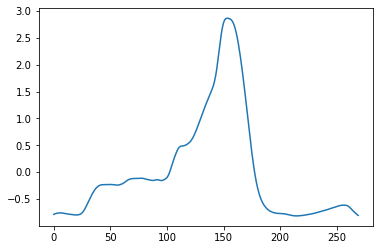

In [14]:
plt.plot(x_all[10,:])

In [19]:
x_fake = model.generate_data(10).reshape(10,270)

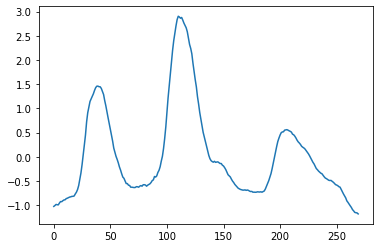

In [23]:
plt.plot(x_fake[0,:])

# Treinando sines

In [32]:
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\TimeGANSine\\sine_dim1_len100_r4.npy'
data = np.load(path).reshape(10000,100)

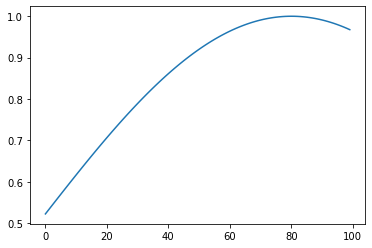

In [38]:
plt.plot(data[10,:])

# Exp FISH

In [1]:
import os
import fire

from mlpy.lib.utils.path import makedirs, tag_path
from mlpy.lib.utils.log import set_logging
from mlpy.lib.tfops.base import tf_keras_set_gpu_allow_growth
from mlpy.configure import DIR_DATA_UCR15
from mlpy.datasets.ucr_uea.data_names import UCR85_DATASETS

from tcgan.lib.exp import Experiment
from configure import DIR_LOG
from tcgan.model.tcgan import TCGAN, TCGANConfig

import numpy as np
from mlpy.lib.data.utils import train_test_split, one_hot_to_dense
import tensorflow as tf
from tcgan.lib.eval import EvaluatorGAN, EvaluatorClf

Using TensorFlow backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\Users\dami_\anaconda3\envs\tcgan\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
# data_name_list = UCR85_DATASETS
data_name_list = ['Fish']

model_cfg = dict(acc_threshold_to_train_d=0.75, kernel_size=10)
exp_cfg = dict(use_testset=True, idx_layer=-3)
exp = Experiment(tag, TCGAN, TCGANConfig, DIR_DATA_UCR15, data_name_list, log_dir,
                    model_cfg_kwargs=model_cfg,
                    **exp_cfg)

fire.Fire(exp.run)

In [2]:
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\Fish\\Fish_TRAIN'
data_train = np.genfromtxt(path, delimiter=',', dtype=np.float32)
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\Fish\\Fish_TEST'
data_test = np.genfromtxt(path, delimiter=',', dtype=np.float32)
print(data_train.shape, data_test.shape)

(175, 464) (175, 464)


In [3]:
# parse
x_tr = data_train[:, :-1]
y_tr = data_train[:, -1].astype(int)
x_te = data_test[:, :-1]
y_te = data_test[:, -1].astype(int)
y_all = np.concatenate([y_tr, y_te])
classes, y_all = np.unique(y_all, return_inverse=True)
n_class = len(classes)
x_tr = x_tr[..., np.newaxis]
x_te = x_te[..., np.newaxis]

# all data can be used in unsupervised learning
x_all = np.vstack([x_tr, x_te])
_, x_te_gan, _, _ = train_test_split(
    x_all, y_all, train_size=0.9, random_state=42, stratify=y_all)
x_tr_gan = x_all  # use all

In [4]:
input_shape = x_tr.shape[1:]
# input_shape = x_tr_gan.shape
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
model_cfg = TCGANConfig(input_shape, log_dir, logger, **dict(acc_threshold_to_train_d=0.75, kernel_size=10))
evaluator = EvaluatorGAN(model_cfg)

09/10 08:47:52 PM, INFO, github_: ****** configure init ******
09/10 08:47:52 PM, INFO, github_: The settings are as follows: 
strides:2
padding:same
initializer:<tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x0000020EF0F34C88>
leak_slope:0.2
logger:<Logger github_ (INFO)>
log_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_
train_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\training
eval_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\evaluation
ckpt_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint
ckpt_prefix:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint\ckpt
seed:42
np_rs:RandomState(MT19937)
verbose:0
x_shape:(463, 1)
noise_shape:(100,)
noise_method:normal
noise_sampler:<function random_normal at 0x0000020ED2110B70>
batch_size:16
epochs:300
g_lr:0.0002
d_lr:0.0002
g_beta1:0.5
d_beta1:0.5
g_units_base:32
d_units_base:32


In [5]:
model = TCGAN(model_cfg, evaluator)
model.fit(x_tr_gan, x_te_gan)
tf.keras.backend.clear_session()

09/10 08:47:54 PM, INFO, github_: ****** fit start ******
09/10 08:47:54 PM, INFO, github_: train from scratch.
09/10 08:47:55 PM, INFO, github_: ****** eval start ******
09/10 08:47:55 PM, INFO, github_: tsne, time=0.4060046672821045
09/10 08:47:55 PM, INFO, github_: nnd, time=0.009535551071166992
09/10 08:47:55 PM, INFO, github_: mmd, time=0.22281718254089355
09/10 08:47:55 PM, INFO, github_: ****** eval end ******
09/10 08:48:01 PM, INFO, github_: epoch[1/300], d_loss=0.6739, g_loss=0.7463, real_loss=0.01988, fake_loss=0.654, acc=0.8304, , time=5.222
09/10 08:48:02 PM, INFO, github_: epoch[2/300], d_loss=0.6319, g_loss=0.8558, real_loss=0.0563, fake_loss=0.5757, acc=0.9162, , time=1.158
09/10 08:48:03 PM, INFO, github_: epoch[3/300], d_loss=0.5687, g_loss=0.8694, real_loss=0.004746, fake_loss=0.564, acc=0.9247, , time=0.9855
09/10 08:48:04 PM, INFO, github_: epoch[4/300], d_loss=0.5799, g_loss=1.002, real_loss=0.08173, fake_loss=0.4981, acc=0.9278, , time=0.9349
09/10 08:48:05 PM, I